In [19]:
pip install -U langchain-community


  Using cached dataclasses_json-0.6.7-py3-none-any.whl.metadata (25 kB)
  Using cached httpx_sse-0.4.0-py3-none-any.whl.metadata (9.0 kB)
  Using cached typing_inspect-0.9.0-py3-none-any.whl.metadata (1.5 kB)
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   -------------------- ------------------- 1.3/2.5 MB 9.5 MB/s eta 0:00:01
   ---------------------------------------- 2.5/2.5 MB 10.2 MB/s eta 0:00:00
Using cached dataclasses_json-0.6.7-py3-none-any.whl (28 kB)
Using cached httpx_sse-0.4.0-py3-none-any.whl (7.8 kB)
Using cached typing_inspect-0.9.0-py3-none-any.whl (8.8 kB)
Note: you may need to restart the kernel to use updated packages.


# Sales Data Analysis

In [23]:
pip show langchain


Name: langchain
Version: 0.3.13
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: C:\Users\eDominer\anaconda3\Lib\site-packages
Requires: aiohttp, langchain-core, langchain-text-splitters, langsmith, numpy, pydantic, PyYAML, requests, SQLAlchemy, tenacity
Required-by: langchain-community
Note: you may need to restart the kernel to use updated packages.


In [20]:
#Importing Required libraries
import pandas as pd
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import Chroma
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Detecting Encodings

In [24]:
%pip install chardet

Note: you may need to restart the kernel to use updated packages.


In [21]:
import chardet

# Detect the encoding
with open("C:/Users/eDominer/Downloads/archive/sales_data_sample.csv", 'rb') as f:
    result = chardet.detect(f.read())

# Use the detected encoding to read the file
encoding = result['encoding']


# Load the dataset

In [22]:
data = pd.read_csv("C:/Users/eDominer/Downloads/archive/sales_data_sample.csv", encoding=encoding)

In [24]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [25]:
data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [27]:
print(data.columns)

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')


In [28]:
# Preprocess data
data['Month'] = data['MONTH_ID']
data['Year'] = data['YEAR_ID']
data['YearMonth'] = pd.to_datetime(data['YEAR_ID'].astype(str) + '-' + data['MONTH_ID'].astype(str) + '-01')

In [29]:
# Selecting relevant features 
features = data[['Month', 'Year', 'QUANTITYORDERED', 'PRICEEACH', 'MSRP', 'DEALSIZE']] 
target = data['SALES']


In [30]:
# Encoding DEALSIZE
data = pd.get_dummies(data, columns=['DEALSIZE'], drop_first=True)

# Updating features after encoding
features = data[['Month', 'Year', 'QUANTITYORDERED', 'PRICEEACH', 'MSRP'] + list(data.columns[data.columns.str.startswith('DEALSIZE_')])]


In [31]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [32]:
#Train Model 
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [33]:
#Predicting Output
predictions = model.predict(X_test)

# Calculating mean squared error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 302965.18092817586


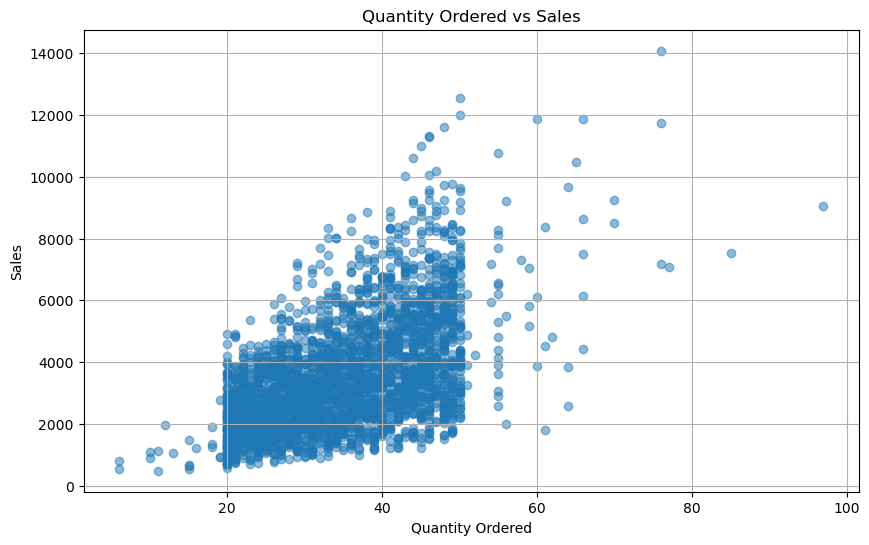

In [34]:
# Ploting Graph
import matplotlib.pyplot as plt

# Scatter plot of Quantity Ordered vs Sales
plt.figure(figsize=(10, 6))
plt.scatter(data['QUANTITYORDERED'], data['SALES'], alpha=0.5)
plt.title('Quantity Ordered vs Sales')
plt.xlabel('Quantity Ordered')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


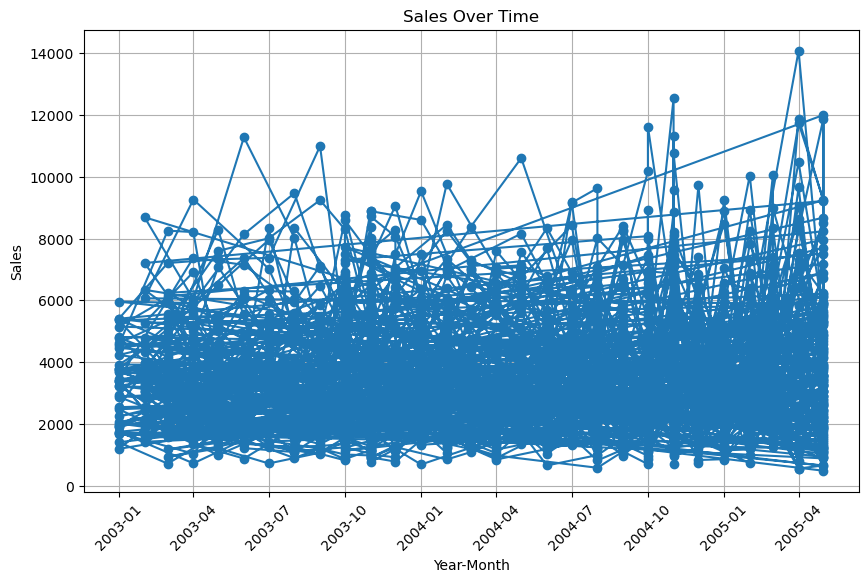

In [35]:
# Line plot of Sales over time
plt.figure(figsize=(10, 6))
plt.plot(data['YearMonth'], data['SALES'], marker='o')
plt.title('Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [41]:
# Create a pipeline with preprocessing and the Random Forest model
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestRegressor(n_estimators=100, random_state=42))])


In [43]:
# Perform cross-validation
cv_scores_rf = cross_val_score(pipeline_rf, features, target, cv=5, scoring='neg_mean_squared_error')


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\eDominer\anaconda3\Lib\site-packages\pandas\core\indexes\base.py", line 3805, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\\_libs\\hashtable_class_helper.pxi", line 7081, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\\_libs\\hashtable_class_helper.pxi", line 7089, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'DEALSIZE'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\eDominer\anaconda3\Lib\site-packages\sklearn\utils\_indexing.py", line 361, in _get_column_indices
    col_idx = all_columns.get_loc(col)
              ^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\eDominer\anaconda3\Lib\site-packages\pandas\core\indexes\base.py", line 3812, in get_loc
    raise KeyError(key) from err
KeyError: 'DEALSIZE'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\eDominer\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eDominer\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\eDominer\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 469, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\eDominer\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 406, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\eDominer\anaconda3\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\eDominer\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 1310, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\eDominer\anaconda3\Lib\site-packages\sklearn\utils\_set_output.py", line 313, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\eDominer\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\eDominer\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py", line 968, in fit_transform
    self._validate_column_callables(X)
  File "C:\Users\eDominer\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py", line 536, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\eDominer\anaconda3\Lib\site-packages\sklearn\utils\_indexing.py", line 369, in _get_column_indices
    raise ValueError("A given column is not a column of the dataframe") from e
ValueError: A given column is not a column of the dataframe


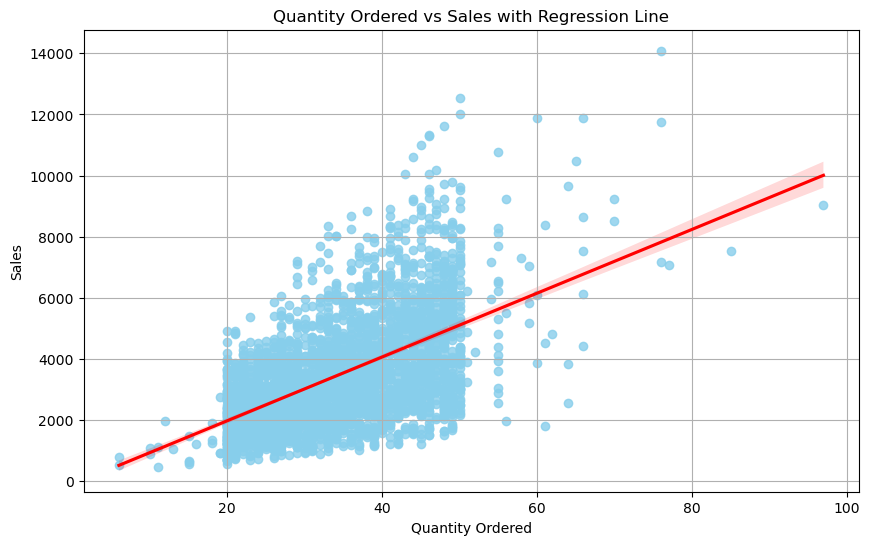

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='QUANTITYORDERED', y='SALES', data=data, scatter_kws={"color": "skyblue"}, line_kws={"color": "red"})
plt.title('Quantity Ordered vs Sales with Regression Line')
plt.xlabel('Quantity Ordered')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


In [37]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [38]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train_pca, y_train)


LinearRegression()

In [39]:
# Make predictions on the test set
predictions = model.predict(X_test_pca)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error with PCA: {mse}')


Mean Squared Error with PCA: 1012975.9653822021


In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Define numerical and categorical features
numerical_features = ['QUANTITYORDERED', 'PRICEEACH', 'MSRP']
categorical_features = ['DEALSIZE_']

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create a full pipeline with a model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LinearRegression())])

# Fit and evaluate the model
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)


ValueError: A given column is not a column of the dataframe